# Explorations of the REF 2021 submission data

Notes
- `Not specified - PP ADDED` is a category added during pre-processing to all string fields to replace missing values

In [1]:
import os
import sys
import pandas as pd

sys.path.append('../src/')
import codebook as cb
import read_write as rw
import preprocess as pp
import visualisations as vis

unpacked_environment_statements = ['Wrexham Glyndŵr University _ Prifysgol Glyndŵr Wrecsam']
    

## Environment statements

In [2]:
fname_ext = ".pdf"

(dset_outputs, inst_outputs) = rw.get_data(rw.DATA_PPROC_OUTPUTS)
(dset_impacts, inst_impacts) = rw.get_data(rw.DATA_PPROC_IMPACTS)

# environment statements
prefix = "Institution environment statement - "
env_inst_statements = pp.clean_fnames(os.listdir(os.path.join(rw.PROJECT_PATH, rw.ENV_INST_PATH)),
                                      template=prefix,
                                      extension=fname_ext)

prefix = "Unit environment statement - "
env_unit_statements = pp.clean_fnames(os.listdir(os.path.join(rw.PROJECT_PATH, rw.ENV_UNIT_PATH)),
                                      template=prefix,
                                      extension=fname_ext)  
                    

print()
print(f"Institutions - outputs : {len(inst_outputs)}")
print(f"Institutions - impacts : {len(inst_impacts)}")
print(f"Institution EV         : {len(env_inst_statements)}")

def compare_lists(list1, list2, name1, name2, list_extra=[]):
    tempset = list(set(list1) - set(list2) - set(list_extra))
    tempset.sort()
    print(f"\n- {name1} but no {name2}: {len(tempset)}")
    if len(tempset) > 0:
        print(f"  {tempset}")

print("\nInstitutions with...")
# outputs-no-environment-statements
compare_lists(inst_outputs, env_inst_statements, 
              "outputs", "environment statements", 
              unpacked_environment_statements)
# environment-statements-no-outputs
compare_lists(env_inst_statements, inst_outputs, 
              "environment statements", "outputs", 
              unpacked_environment_statements)
# impacts-no-environment-statements
compare_lists(inst_impacts, env_inst_statements, 
              "impacts", "environment statements", 
              unpacked_environment_statements)
# environment-statements-no-impacts
compare_lists(env_inst_statements, inst_impacts, 
              "environment statements", "impacts", 
              unpacked_environment_statements)


Read data/processed/Outputs_ppreprocessed.csv.gz: 185353 records
Read data/processed/ImpactCaseStudies_ppreprocessed.csv.gz: 6361 records

Institutions - outputs : 157
Institutions - impacts : 155
Institution EV         : 143

Institutions with...

- outputs but no environment statements: 13
  ['AECC University College', 'Courtauld Institute of Art', 'Falmouth University', 'Glasgow School of Art', 'Harper Adams University', 'Rose Bruford College of Theatre and Performance', 'Royal College of Art(The)', 'Royal College of Music', 'Royal Northern College of Music', 'The Royal Academy of Music', 'Trinity Laban Conservatoire of Music and Dance', 'University College of Osteopathy (The)', 'University of the Arts, London']

- environment statements but no outputs: 0

- impacts but no environment statements: 13
  ['AECC University College', 'Courtauld Institute of Art', 'Falmouth University', 'Glasgow School of Art', 'Harper Adams University', 'Rose Bruford College of Theatre and Performance', 

## `Outputs` data

#### All records

Read data/processed/Outputs_ppreprocessed.csv.gz: 185353 records

                                      Records  Records (%)
Output type name                                          
Artefact                                  378         0.20
Authored book                           11801         6.37
Chapter in book                          9475         5.11
Composition                               430         0.23
Conference contribution                  2272         1.23
Design                                    119         0.06
Digital or visual media                   360         0.19
Edited book                              2135         1.15
Exhibition                                751         0.41
Journal article                        154826        83.53
Other                                    1146         0.62
Patent/ published patent application       37         0.02
Performance                               312         0.17
Research data sets and databases           31    

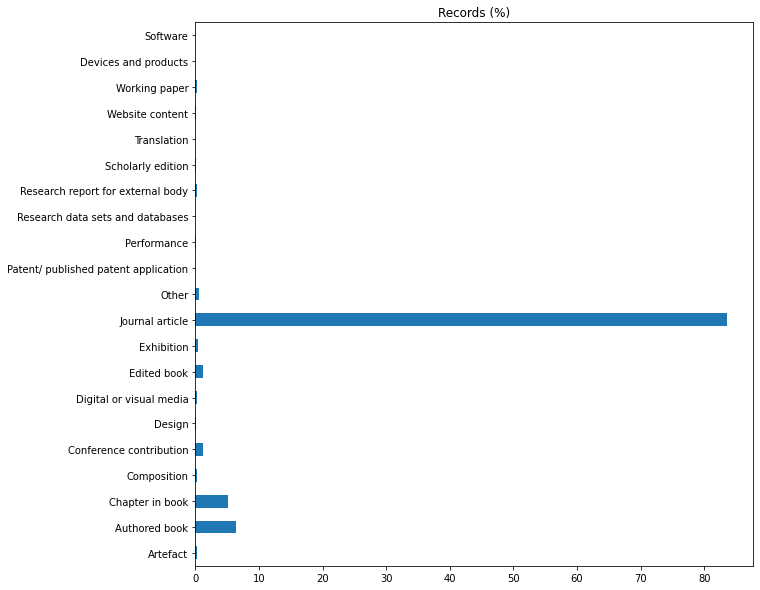


                                           Records  Records (%)
Open access status                                             
Access exception                              1166         0.63
Compliant                                    85913        46.35
Deposit exception                             4748         2.56
Exception within 3 months of publication      2581         1.39
Not compliant                                 2401         1.30
Not specified - PP ADDED                     24173        13.04
Other exception                               1010         0.54
Out of scope for open access requirements    58482        31.55
Technical exception                           4879         2.63


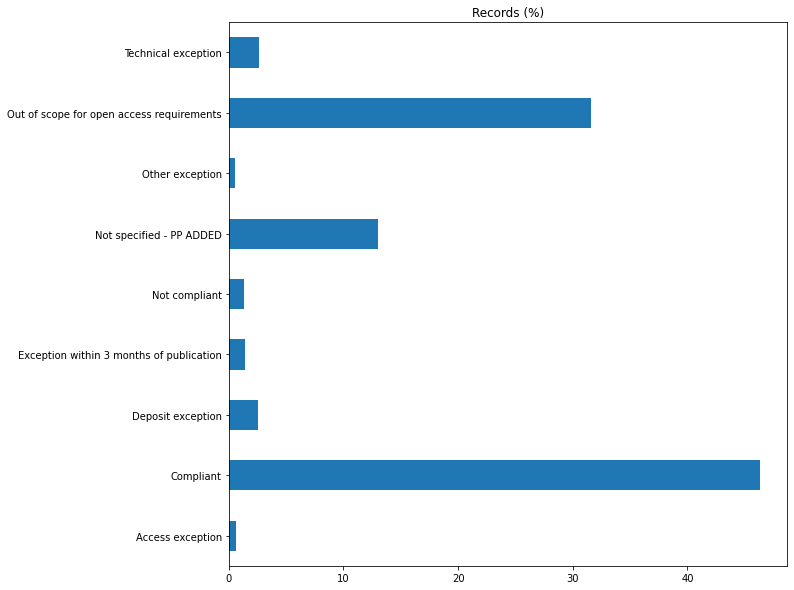

In [3]:
(dset, _) = rw.get_data(rw.DATA_PPROC_OUTPUTS)

for column in [cb.COL_OUTPUT_TYPE_NAME, cb.COL_OPEN_ACCESS]:
    vis.calculate_and_visualise_counts(dset, column, do_plot="perc", sort=False)

#### Records with `Output type` as _Software_

In [4]:
type_of_interest = "Software"
(dset, _) = rw.get_data(rw.DATA_PPROC_OUTPUTS)
dset = dset[dset[cb.COL_OUTPUT_TYPE_NAME] == type_of_interest].copy()
print(f"\n'{cb.COL_OUTPUT_TYPE_NAME}' as '{type_of_interest}' - {dset.shape[0]} records")

for column in [cb.COL_OPEN_ACCESS,
               cb.COL_OUTPUT_INTERDISCIPLINARY,
               cb.COL_INST_NAME,
               cb.COL_PANEL_NAME,
               cb.COL_OUTPUT_CITATIONS]:
    vis.calculate_and_visualise_counts(dset, column)

Read data/processed/Outputs_ppreprocessed.csv.gz: 185353 records

'Output type name' as 'Software' - 11 records

                                           Records  Records (%)
Open access status                                             
Not specified - PP ADDED                        11       100.00
Access exception                                 0         0.00
Compliant                                        0         0.00
Deposit exception                                0         0.00
Exception within 3 months of publication         0         0.00
Not compliant                                    0         0.00
Other exception                                  0         0.00
Out of scope for open access requirements        0         0.00
Technical exception                              0         0.00

                   Records  Records (%)
Interdisciplinary                      
No                       8        72.73
Yes                      3        27.27

                     

#### Records with `computation` in `Title`

In [5]:
term_of_interest = "computation"
(dset, _) = rw.get_data(rw.DATA_PPROC_OUTPUTS)
dset = dset[dset[cb.COL_OUTPUT_TITLE].str.contains(term_of_interest, case=False)].copy()
print(f"\n'{cb.COL_OUTPUT_TITLE}' containing '{term_of_interest}' - {dset.shape[0]} records")

for column in [cb.COL_OUTPUT_TYPE_NAME, 
               cb.COL_OPEN_ACCESS,
               cb.COL_OUTPUT_INTERDISCIPLINARY,
               cb.COL_PANEL_NAME,
               cb.COL_INST_NAME]:
    vis.calculate_and_visualise_counts(dset, column)

Read data/processed/Outputs_ppreprocessed.csv.gz: 185353 records

'Title' containing 'computation' - 596 records

                                      Records  Records (%)
Output type name                                          
Journal article                           560        93.96
Conference contribution                    22         3.69
Authored book                               8         1.34
Chapter in book                             4         0.67
Working paper                               1         0.17
Edited book                                 1         0.17
Artefact                                    0         0.00
Research data sets and databases            0         0.00
Devices and products                        0         0.00
Website content                             0         0.00
Translation                                 0         0.00
Scholarly edition                           0         0.00
Research report for external body           0         0.00
O

## `ImpactCaseStudies` data

#### All records

Read data/processed/ImpactCaseStudies_ppreprocessed.csv.gz: 6361 records

                                                Records  Records (%)
Main panel name                                                     
Social sciences                                    2146        33.74
Arts and humanities                                1528        24.02
Medicine, health and life sciences                 1419        22.31
Physical sciences, engineering and mathematics     1268        19.93


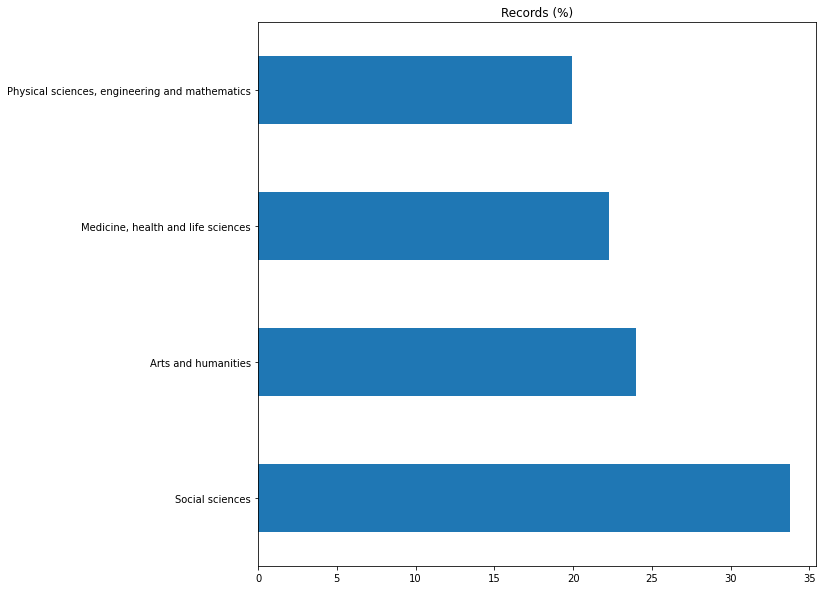

In [6]:
(dset, _) = rw.get_data(rw.DATA_PPROC_IMPACTS)

for column in [cb.COL_PANEL_NAME]:
    vis.calculate_and_visualise_counts(dset, column, do_plot="perc")

#### Records with `computation` in `Title` or `Summary`

In [7]:
term_of_interest = "computation"
(dset, _) = rw.get_data(rw.DATA_PPROC_IMPACTS)

# select rows containing the term of interest in title or summary
dset = dset[dset[cb.COL_IMPACT_TITLE].str.contains(term_of_interest, case=False) |
            dset[cb.COL_IMPACT_SUMMARY].str.contains(term_of_interest, case=False)
            ].copy()
print(f"\n'{cb.COL_IMPACT_TITLE}' or '{cb.COL_IMPACT_SUMMARY}' containing '{term_of_interest}' - {dset.shape[0]} records")


for column in [cb.COL_PANEL_NAME,
               cb.COL_INST_NAME]:
    vis.calculate_and_visualise_counts(dset, column)

print(f"\nTitles of impact case studies with '{term_of_interest}' in '{cb.COL_IMPACT_TITLE}' or '{cb.COL_IMPACT_SUMMARY}':\n")
for irow, row in dset.iterrows():
    print(f"{row[cb.COL_INST_NAME]}, {row[cb.COL_PANEL_NAME]}:\n {row[cb.COL_IMPACT_TITLE]}\n")

Read data/processed/ImpactCaseStudies_ppreprocessed.csv.gz: 6361 records

'Title' or '1. Summary of the impact' containing 'computation' - 60 records

                                                Records  Records (%)
Main panel name                                                     
Physical sciences, engineering and mathematics       45        75.00
Arts and humanities                                   5         8.33
Medicine, health and life sciences                    5         8.33
Social sciences                                       5         8.33

                                                      Records  Records (%)
Institution name                                                          
University of Oxford                                        4         6.67
Imperial College of Science, Technology and Medicine        4         6.67
The University of Reading                                   3         5.00
King's College London                                      

## `Results` data

Read data/processed/Results_ppreprocessed.csv.gz: 7552 records

                                                Records  Records (%)
Main panel name                                                     
Arts and humanities                                2216        29.34
Medicine, health and life sciences                 1268        16.79
Physical sciences, engineering and mathematics     1432        18.96
Social sciences                                    2636        34.90


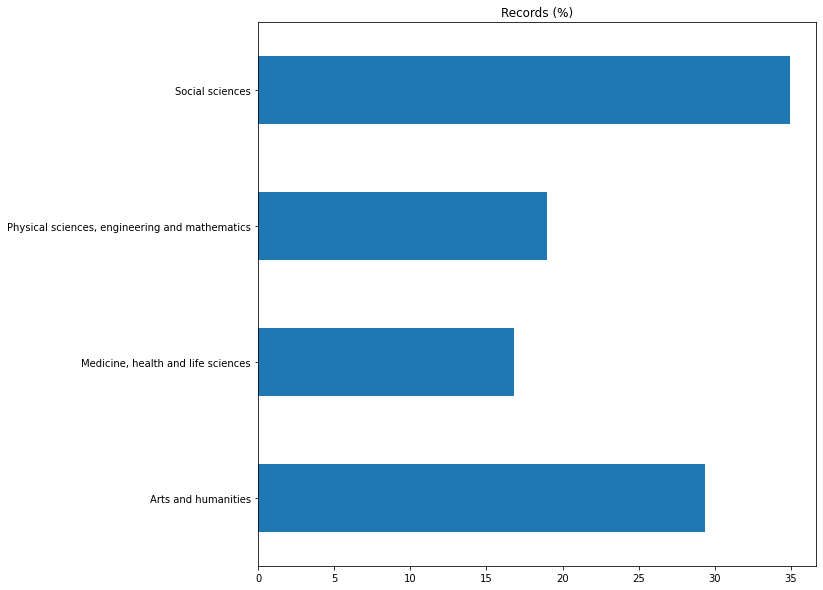


                                        Records  Records (%)
% of eligible staff submitted (binned)                      
[0, 10]                                      32         0.42
(10, 20]                                    172         2.28
(20, 30]                                    312         4.13
(30, 40]                                    268         3.55
(40, 50]                                    348         4.61
(50, 60]                                    280         3.71
(60, 70]                                    300         3.97
(70, 80]                                    340         4.50
(80, 90]                                    356         4.71
(90, 100]                                  4944        65.47


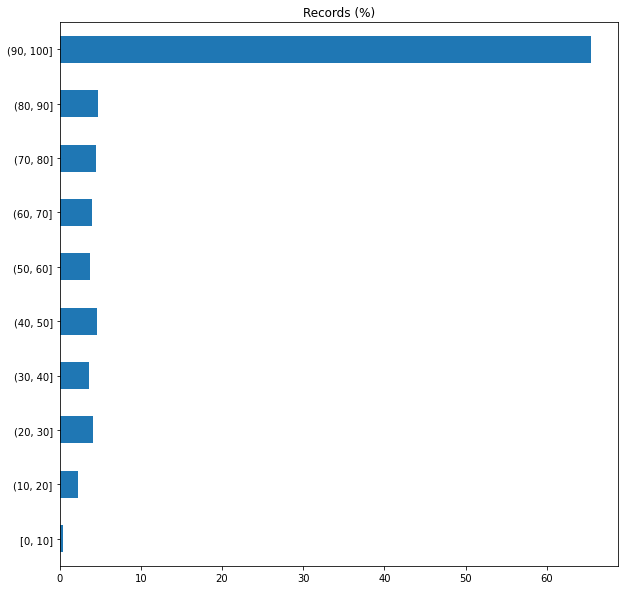


                  Records  Records (%)
4 stars (binned)                      
[0, 10]              1795        23.77
(10, 20]              916        12.13
(20, 30]              999        13.23
(30, 40]              999        13.23
(40, 50]             1067        14.13
(50, 60]              491         6.50
(60, 70]              468         6.20
(70, 80]              351         4.65
(80, 90]              225         2.98
(90, 100]             223         2.95


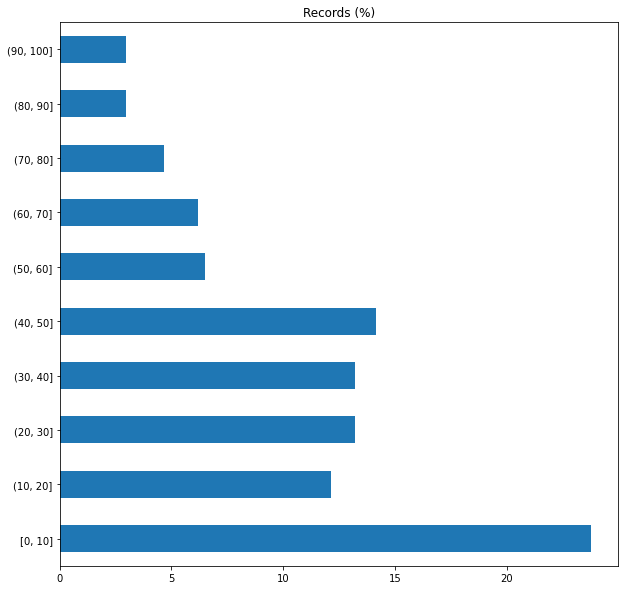


                  Records  Records (%)
3 stars (binned)                      
[0, 10]               599         7.93
(10, 20]              474         6.28
(20, 30]              885        11.72
(30, 40]             1373        18.18
(40, 50]             1891        25.04
(50, 60]              894        11.84
(60, 70]              699         9.26
(70, 80]              444         5.88
(80, 90]              183         2.42
(90, 100]              92         1.22


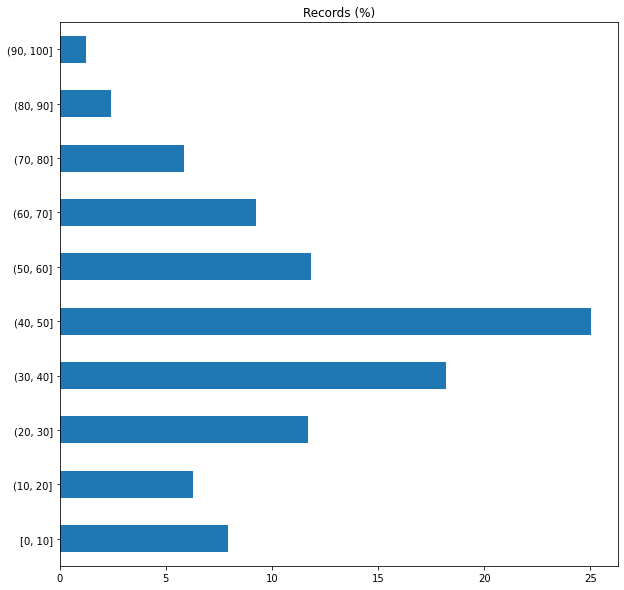


                  Records  Records (%)
2 stars (binned)                      
[0, 10]              3167        41.94
(10, 20]             1491        19.74
(20, 30]             1047        13.86
(30, 40]              714         9.45
(40, 50]              551         7.30
(50, 60]              134         1.77
(60, 70]              153         2.03
(70, 80]              197         2.61
(80, 90]               53         0.70
(90, 100]              27         0.36


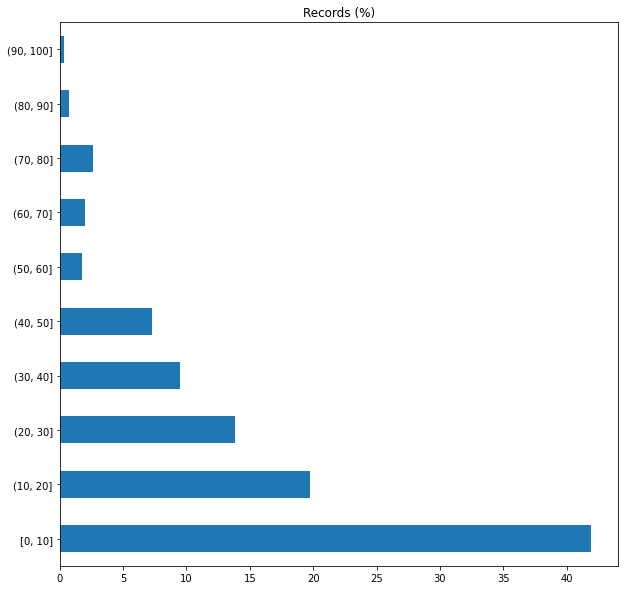


                 Records  Records (%)
1 star (binned)                      
[0, 10]             6723        89.02
(10, 20]             336         4.45
(20, 30]             196         2.60
(30, 40]              93         1.23
(40, 50]              92         1.22
(50, 60]               9         0.12
(60, 70]              26         0.34
(70, 80]              33         0.44
(80, 90]               8         0.11
(90, 100]             18         0.24


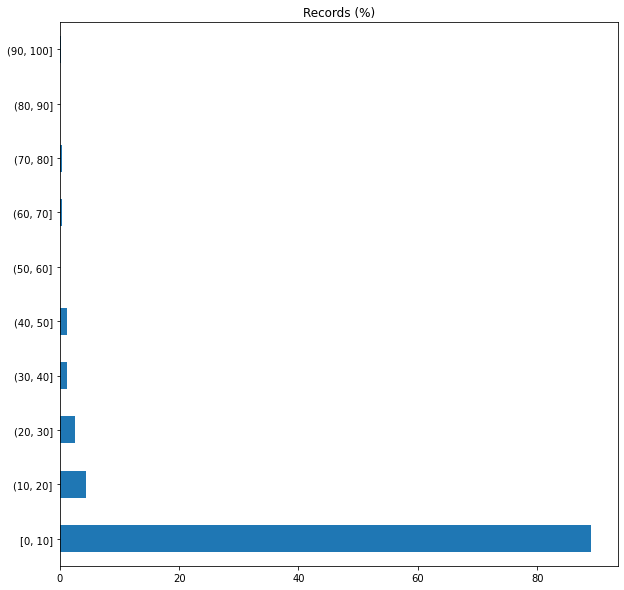


                       Records  Records (%)
Unclassified (binned)                      
[0, 10]                   7469        98.90
(10, 20]                    23         0.30
(20, 30]                    18         0.24
(30, 40]                     9         0.12
(40, 50]                    12         0.16
(50, 60]                     0         0.00
(60, 70]                     0         0.00
(70, 80]                     1         0.01
(80, 90]                     0         0.00
(90, 100]                    2         0.03


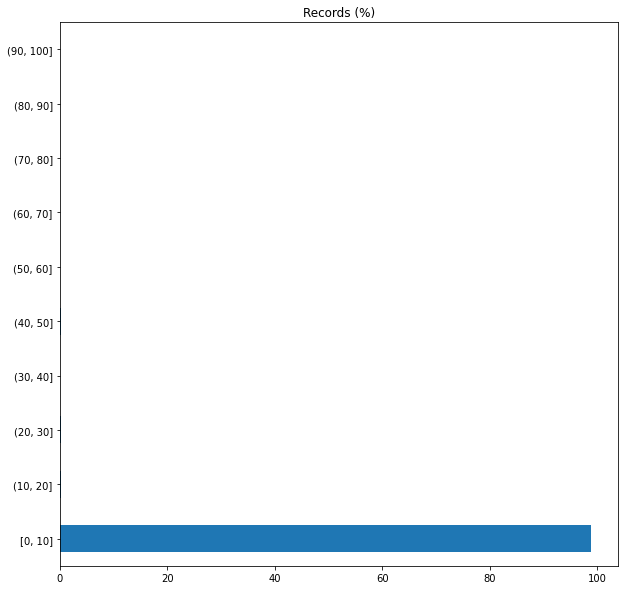

In [8]:
import importlib
importlib.reload(rw)
importlib.reload(cb)
importlib.reload(pp)

(dset, _) = rw.get_data(rw.DATA_PPROC_RESULTS)

for column in [cb.COL_PANEL_NAME,
               cb.COL_RESULTS_PERC_STAFF_SUBMITTED_BINNED,
               cb.COL_RESULTS_4star_BINNED,
               cb.COL_RESULTS_3star_BINNED,
               cb.COL_RESULTS_2star_BINNED,
               cb.COL_RESULTS_1star_BINNED,
               cb.COL_RESULTS_UNCLASSIFIED_BINNED]:
    vis.calculate_and_visualise_counts(dset, column, do_plot="perc", sort=False)
